In [1]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
"""
분석 기간
"""
start_date = '20160101'
end_date = '20221231'

In [3]:
"""
POSCO홀딩스 티커
"""
code = '005490'

In [4]:
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='y')

In [5]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2016-12-31,476991,22.07,0.34,7432,4.88,8000
2017-12-31,472954,141.19,0.55,1845,3.07,8000
2018-12-31,486007,20.39,0.70,16627,2.36,8000
2019-12-31,501600,6.88,0.47,34464,3.38,8000
2020-12-31,497452,11.29,0.47,20911,4.24,10000
2021-12-31,510076,11.96,0.54,22823,3.66,10000
2022-12-31,508464,13.89,0.55,20165,2.86,8000


In [ ]:
df_f = df_f.DPS

In [6]:
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='d')

In [7]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2016-01-04,476991,22.07,0.34,7432,4.88,8000
2016-01-05,476991,22.74,0.35,7432,4.73,8000
2016-01-06,476991,22.67,0.35,7432,4.75,8000
2016-01-07,476991,22.07,0.34,7432,4.88,8000
2016-01-08,476991,22.20,0.35,7432,4.85,8000
...,...,...,...,...,...,...
2022-12-23,666803,3.30,0.43,87330,5.89,17000
2022-12-26,666803,3.34,0.44,87330,5.82,17000
2022-12-27,666803,3.34,0.44,87330,5.82,17000


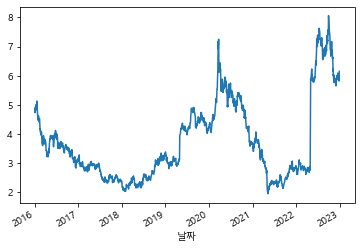

In [8]:
df_f.DIV.plot()
plt.show()

In [9]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

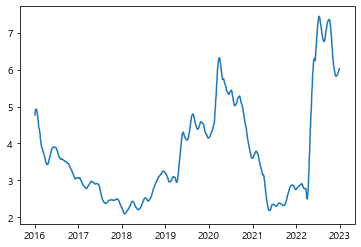

In [10]:
plt.plot(df_f.index.to_list(), div_yields)
plt.show()

In [11]:
df_p = stock.get_market_ohlcv(start_date, end_date, code)
df_p

,시가,고가,저가,종가,거래량
날짜,,,,,
2016-01-04,167000,169000,164000,164000,284021
2016-01-05,165000,169000,165000,169000,305792
2016-01-06,169500,171000,167500,168500,292226
2016-01-07,167000,168500,164000,164000,312956
2016-01-08,161000,166000,160500,165000,323501
...,...,...,...,...,...
2022-12-23,285000,289500,283500,288500,341122
2022-12-26,289500,293500,289000,292000,331276
2022-12-27,293000,294500,290500,292000,424295


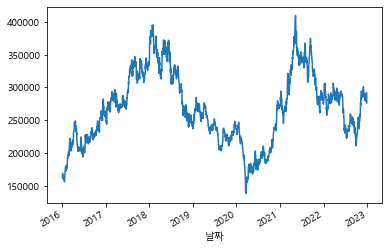

In [12]:
df_p.종가.plot()
plt.show()

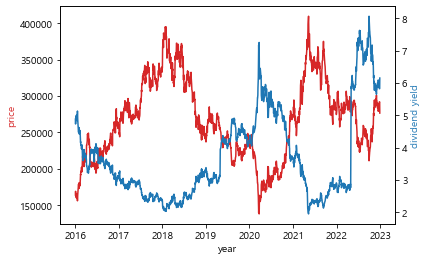

In [13]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(df_p['종가'], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(df_f['DIV'], color=color)
plt.show()

In [14]:
np.corrcoef(df_p['종가'], df_f['DIV'])

array([[ 1.        , -0.68484004],
       [-0.68484004,  1.        ]])

""" 로우 패스 필터 """

In [44]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [46]:
close_prices = savgol_filter(df_p.종가, 51, 3)

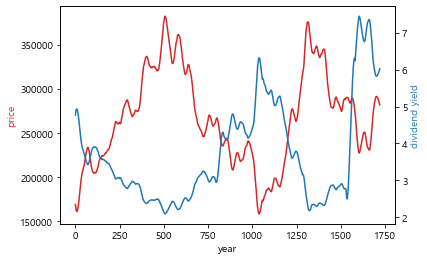

In [47]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(close_prices, color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(div_yields, color=color)
plt.show()

In [52]:
np.corrcoef(div_yields, close_prices)

array([[ 1.        , -0.68625992],
       [-0.68625992,  1.        ]])

"""
매수점수 계산
"""

In [49]:
df_cur_f = stock.get_market_fundamental('20230215', '20230215', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-15,666803,3.73,0.49,87330,5.22,17000


In [50]:
cur_div = df_cur_f.DIV[0]
cur_div

5.22

In [51]:
calculate_buy_score(cur_div, min(div_yields), max(div_yields))

58

In [26]:
div_min = min(df_f.DIV)
div_min

1.9500000476837158

In [28]:
div_max = max(df_f.DIV)
div_max

8.0600004196167

In [30]:
df_cur_f = stock.get_market_fundamental('20230215', '20230215', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-15,666803,3.73,0.49,87330,5.22,17000


In [42]:
cur_dps = df_cur_f.DPS[0]
cur_dps

17000

In [43]:
target_price = cur_dps/div_min * 100
target_price

871794.8504767087

In [ ]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)


"""
로우 패스 필터
"""

In [15]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [41]:
min(div_yields)

2.0901673

In [ ]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(df_p['종가'], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(df_f['DIV'], color=color)
plt.show()

In [16]:
df_cur_f = stock.get_market_fundamental('20230214', '20230214', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-14,666803,3.52,0.46,87330,5.54,17000


In [17]:
df_cur_p = stock.get_market_ohlcv('20230214', '20230214', code)
df_cur_p

,시가,고가,저가,종가,거래량
날짜,,,,,
2023-02-14,306500,313000,304500,307000,495815


In [18]:
cur_price = df_cur_p.종가[0]
cur_price

307000

In [19]:
div_min = min(div_yields)
div_min

2.0901673

In [20]:
div_max = max(div_yields)
div_max

7.4456363

In [54]:
cur_dps = df_cur_f.DPS[0]
cur_dps

17000

In [55]:
target_price = cur_dps/div_min * 100
target_price

871794.8504767087

In [23]:
buy_price = cur_div/div_max * 100
buy_price

228321.65550373876

In [29]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [25]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

64